<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/comparing_of_classifiers_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Classifiers for Building Classification Models


## Clone Dataset

In [ ]:
# Cloning Dataset into Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

Cloning into 'This-is-splitted-for-COVID-and-NORMAL-Only'...
remote: Enumerating objects: 3013, done.
remote: Total 3013 (delta 0), reused 0 (delta 0), pack-reused 3013
Receiving objects: 100% (3013/3013), 1.71 GiB | 28.25 MiB/s, done.
Checking out files: 100% (3005/3005), done.


# Reading the Training images


In [ ]:
size = 256

In [ ]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Covid/*.*")
cv_img = []
for img in path_l:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 


arrayl = np.asarray(cv_img[0:500])
print(arrayl.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array2 = np.asarray(cv_img[0:500]) 
print(array2.shape) 

(500, 256, 256, 3)
(500, 256, 256, 3)


# Reading the Testing images


In [ ]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 

array3 = np.asarray(cv_img[0:50]) 
print(array3.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 

array4 = np.asarray(cv_img[0:50])
print(array4.shape) 


(50, 256, 256, 3)
(50, 256, 256, 3)


# Concatenating Covid and Normal arrays into one variable for train and test:

In [ ]:
# Concatenating Covid and Normal arrays into one variable for train and test:
X_train = np.concatenate((arrayl,array2))

X_test = np.concatenate((array3,array4))

X_train.shape , X_test.shape 

((1000, 256, 256, 3), (100, 256, 256, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
# print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


(500, 500)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
# print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

(50, 50)

# Concatenating the labels for Covid and Normal for training and testing:

In [ ]:
# Concatenating the labels for Covid and Normal for training and testing:
Y_train = np.concatenate((labels0,labels1)) 
Y_test = np.concatenate((labels0s,labels1s)) 
Y_train.shape, Y_test.shape 


((1000,), (100,))

### 2.3. data dimension

In [ ]:
X_train.shape, Y_train.shape

((1000, 256, 256, 3), (1000,))

In [ ]:
X_test.shape, Y_test.shape

((100, 256, 256, 3), (100,))

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA

print("original shape:   ", X_train.shape)
X_train = X_train.reshape(X_train.shape[0],size*size*3)
X_test = X_test.reshape(X_test.shape[0],size*size*3)
print("Reshaped shape:", X_train.shape)

from sklearn.preprocessing import scale # Data scaling
X_train = scale(X_train)
X_test = scale(X_test)


pca = PCA(n_components = 300)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("PCA transformed shape:", X_train.shape)

original shape:    (1000, 256, 256, 3)
Reshaped shape: (1000, 196608)
PCA transformed shape: (1000, 300)


Text(0, 0.5, 'Second principle component')

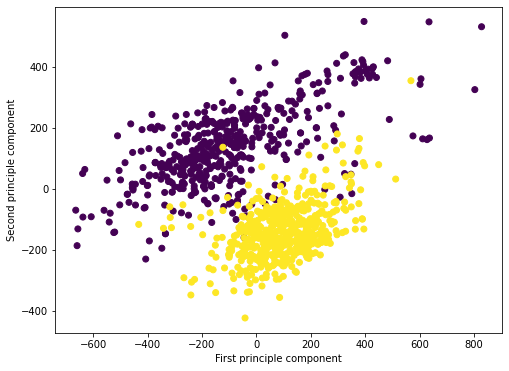

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

cumulative explained variance:  0.9555875016968243


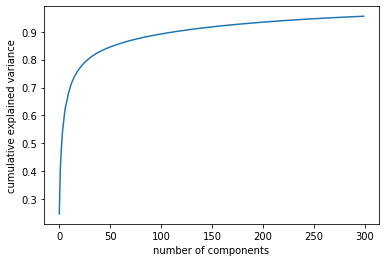

In [ ]:
# pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print('cumulative explained variance: ',max(np.cumsum(pca.explained_variance_ratio_)))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

In [ ]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2. Defining learning classifiers

In [ ]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(kernel="poly", degree=3, C=0.025,probability=True),
    SVC(kernel="rbf", C=1, gamma=2,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [ ]:
from sklearn import metrics
scores = []
Y_pred = []
accuracys = []
precis = [] 
recals = []
F1 = []
rocaucs = []
cms = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, Y_test)

    acc = metrics.accuracy_score(Y_test, pred)
    preci = metrics.precision_score(Y_test, pred)
    recal = metrics.recall_score(Y_test, pred)
    F = metrics.f1_score(Y_test, pred)
    rocauc = metrics.roc_auc_score(Y_test, pred)
    cm = metrics.confusion_matrix(Y_test, pred)


    
    scores.append(score)
    Y_pred.append(pred)
    accuracys.append(acc)
    precis.append(preci)
    recals.append(recal)
    F1.append(F)
    rocaucs.append(rocauc)
    cms.append(cm)


## 4. Analysis of Model Performance

### 4.1. Import library

In [ ]:
import pandas as pd
import seaborn as sns

### 4.2. Create data frame of *model performance*

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df['accuracy'] = acc
df['precision'] = precis
df['recal'] = recals
df['F1'] = F1
df['roc_auc_score'] = rocaucs
df

,name,score,accuracy,precision,recal,F1,roc_auc_score
0,Nearest_Neighbors,0.97,0.96,0.960784,0.98,0.970297,0.97
1,Linear_SVM,0.96,0.96,0.960000,0.96,0.960000,0.96
2,Polynomial_SVM,0.74,0.96,0.657895,1.00,0.793651,0.74
3,RBF_SVM,0.50,0.96,0.500000,1.00,0.666667,0.50
4,Gaussian_Process,0.95,0.96,0.941176,0.96,0.950495,0.95
5,Gradient_Boosting,0.95,0.96,0.941176,0.96,0.950495,0.95
6,Decision_Tree,0.92,0.96,0.920000,0.92,0.920000,0.92
7,Extra_Trees,0.77,0.96,0.935484,0.58,0.716049,0.77
8,Random_Forest,0.90,0.96,0.900000,0.90,0.900000,0.90
9,Neural_Net,0.95,0.96,0.941176,0.96,0.950495,0.95


### 4.3. Adding colors to the data frame

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score,accuracy,precision,recal,F1,roc_auc_score
0,Nearest_Neighbors,0.970000,0.960000,0.960784,0.980000,0.970297,0.970000
1,Linear_SVM,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000
2,Polynomial_SVM,0.740000,0.960000,0.657895,1.000000,0.793651,0.740000
3,RBF_SVM,0.500000,0.960000,0.500000,1.000000,0.666667,0.500000
4,Gaussian_Process,0.950000,0.960000,0.941176,0.960000,0.950495,0.950000
5,Gradient_Boosting,0.950000,0.960000,0.941176,0.960000,0.950495,0.950000
6,Decision_Tree,0.920000,0.960000,0.920000,0.920000,0.920000,0.920000
7,Extra_Trees,0.770000,0.960000,0.935484,0.580000,0.716049,0.770000
8,Random_Forest,0.900000,0.960000,0.900000,0.900000,0.900000,0.900000
9,Neural_Net,0.950000,0.960000,0.941176,0.960000,0.950495,0.950000


### 4.4. Bar plot of model performance

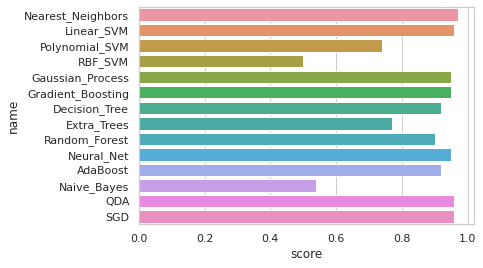

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---

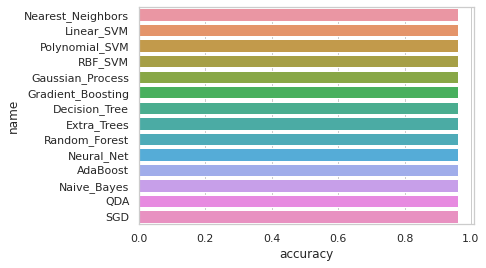

In [ ]:
ax = sns.barplot(y="name", x="accuracy", data=df)

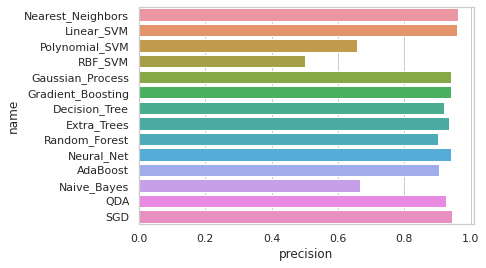

In [ ]:
ax = sns.barplot(y="name", x="precision", data=df)

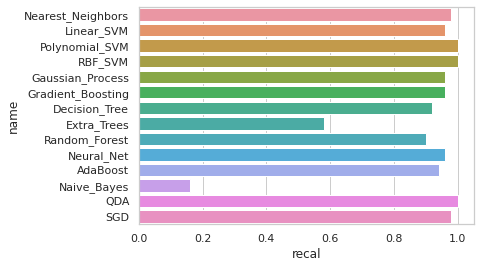

In [ ]:
ax = sns.barplot(y="name", x="recal", data=df)

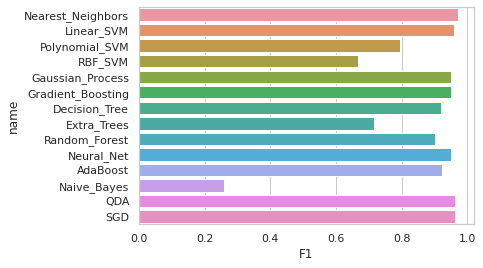

In [ ]:
ax = sns.barplot(y="name", x="F1", data=df)

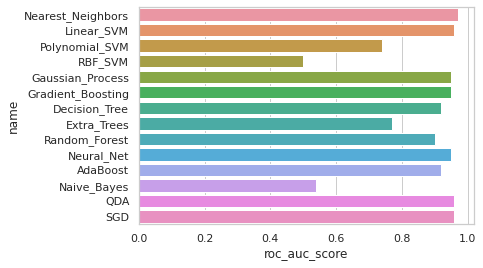

In [ ]:
ax = sns.barplot(y="name", x="roc_auc_score", data=df)

In [ ]:
cmat = np.asarray(cms)

### 4.5. Confusion Matrix

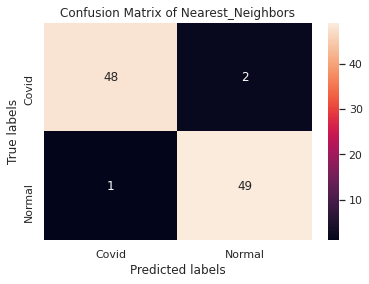

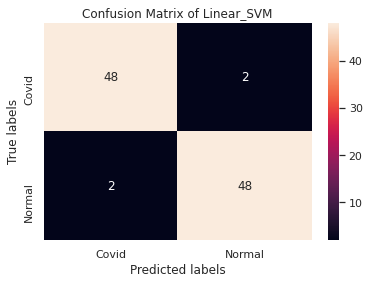

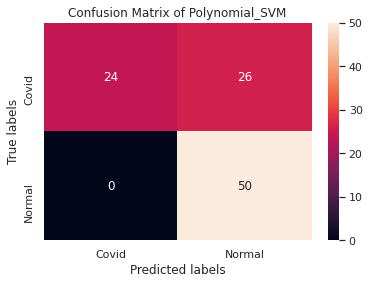

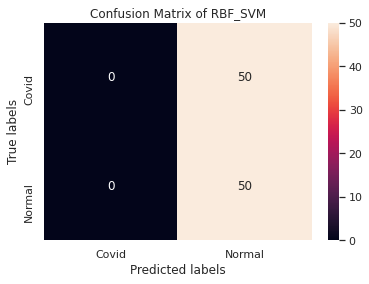

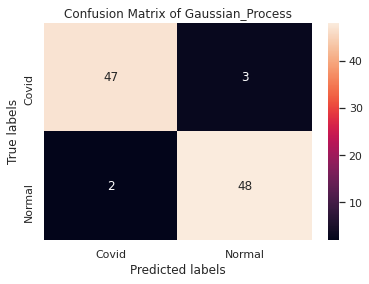

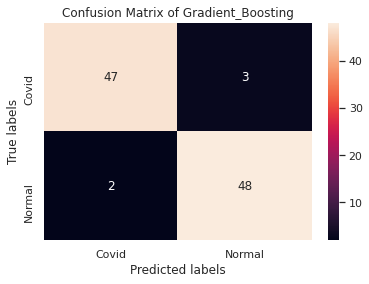

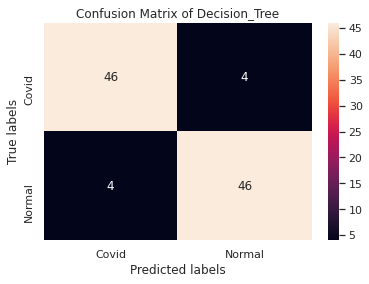

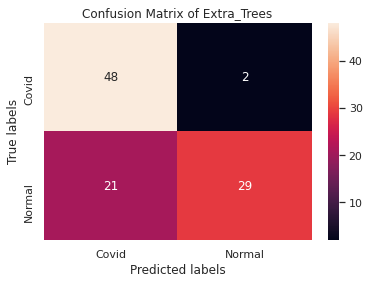

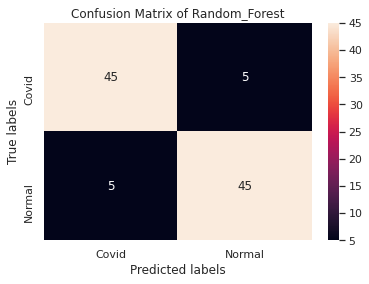

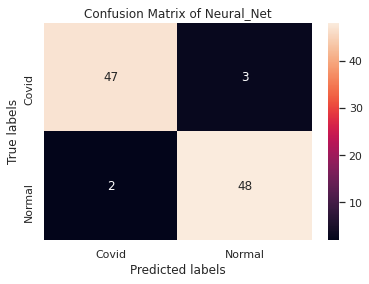

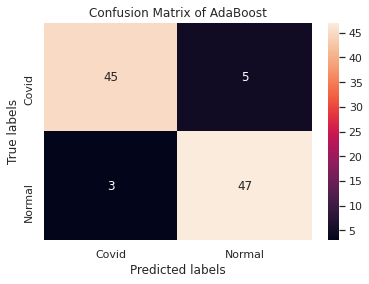

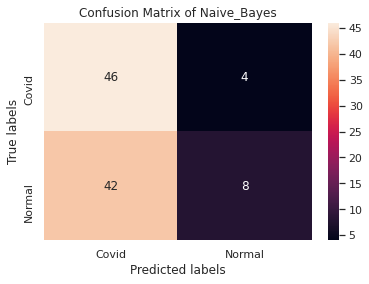

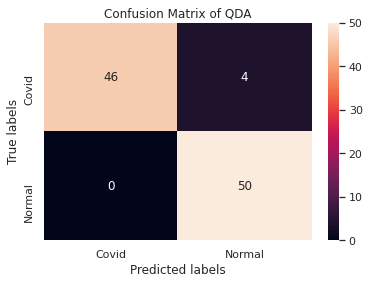

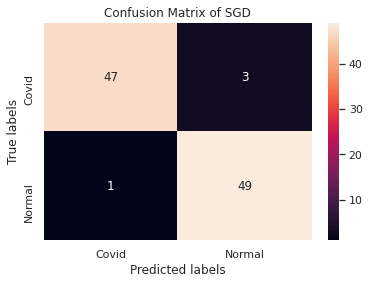

In [ ]:
for name, cm in zip(names, cmat):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix of '+name); 
  ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()